# Bayes' Theorem


## Review of Conditional Probability?

<img src="img/bayes.jpg"
     width = '500'
     alt="Dice"
     style="float: center; margin-left: 10px;" />
<caption><left> Img Resourse:[Mattbuck](https://commons.wikimedia.org/wiki/User:Mattbuck) </left></caption>
     
     

- In probability theory, Bayes’ theorem (alternatively Bayes’ law or Bayes’ rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

- In mathematical notation it is expressed as:

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)} $$

__Notation__

$P(A|B)$ -- probability of A given B

$P(B|A)$ -- probability of B given A


__Note:__ In fact, the reason why such relation holds is easy to show: The main ingredient is the definition of conditional probability:




$$
 \left.
    \begin{array} \\
        P(A|B) = \frac{P(A \cap B)}{P(B)} \Rightarrow  P(A|B) P(B) =P(A\cap B) \\
        P(B|A) = \frac{P(B\cap A)}{P(A)} \Rightarrow    P(B|A)P(A) =P(B \cap A) 
    \end{array}
 \right \}= P(A|B)  =\frac{P(A)P(B|A)}{P(B)}\\
$$




[Why should you care?](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/07.pdf)

[https://scikit-learn.org/stable/modules/naive_bayes.html]

## Family with two children

[Example is from: Data Science From Scratch](https://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X)

- Assume that each child is equally likely to be a girl or boy

- The gender of the second child is independent of the gender of the first child


__Q:__ Now we can ask what is the probability of the event “both children are girls” (B) conditional on the event “the older child is a girl” (G)?

In [2]:
## your answer here

## Here naming is just for the instructional purposes
## Don't name your variables in this way in your own code!

probability_B = .25

probability_G = .5

probability_B_and_G = .25

probability_B_given_G = probability_B_and_G/probability_G

print(probability_B_given_G)


0.5


__Q:__ We could also ask about the probability of the event “both children are girls” conditional on the event “at least one of the children is a girl” (L).

In [18]:
## your answer here

probability_B = 1/4

probability_L = 3/4

probability_B_and_L = 1/4

probability_B_given_L = (probability_B)/(probability_L)

probability_B_given_L

0.3333333333333333

Let's simulate this situation

In [17]:
# %load -r 25-45 supplement.py

## Discussion of the terms in the theorem

$P(A|B)$ -- Posterior

$P(B|A)$ -- Likelihood

$P(A)$ -- Prior

Why these names?

__Your Turn__

Studies from the Journal of the American Medical Association estimate that the sensitivity (True Positive Rate) of common drug tests is about 60% and the specificity (True Negative Rate) is about 99%. That is, the test will produce 60% true positive results for drug users and 99% true negative results for non-drug users. [More on Sensitivity-Specifity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)
Now suppose these tests are applied to a workforce where the actual rate of drug use is 5%. Of the employees who test positive, how many of them actually use drugs?

__Solution:__


Notation:

P(D) -- probability of drug use without any data

P(D|+)  -- the probability of drug use given a positive test - Note that this is what we want to find.

P(+) -- probability of getting a positive test result


__We want to find:__

$$ P(D|+) = \frac{P(D)P(+|D)}{P(+)} $$

Which one of these are known?

In [23]:
D=probability_drug_user = 0.05

P_D=probability_positive_given_drug_user = .6

P=probability_positive = (.05)*(.6)+(.95)*(.01)

(D)*(P_D)/P


0.7594936708860759

Do we know probability of getting positive test result?

Hint: To get a positive test result we have two cases:

 - Either the subject do use the drug and the test result is positive
 
 - Or the subject is not using the drug and we still get the positive test result.
 




In [10]:
## finish the problem here

__Try!__

Write a function that return probability of being drug user given the test result is positive. 

In [14]:
# %load -r 17-22 supplement.py


In [15]:
is_drug(sensitivity = 0.99, specificity = 0.99, prior = 0.001)

0.09016393442622944

__The law of Total Probability__

Let E and F are two mutually exclusive events and $E \cup F = \Omega$. Then for another event B we have: 

$$
P(B) = P(B|E)P(E) + P(B|F)P(F)
$$


# Bayesian vs Frequentist

- Chicken or Egg??


-- Parameters are fixed and data varies vs data is fixed and parameters are varying.

1. In frequentist Approach Coin Toss Experiment

 - We set a parameter for having a Head for one coin toss (say p)
 
 - Collect a data (say toss the coin many times)
 
 - Then calculate the probability of getting such data with this parameters.
 
2. In Bayesian Approach:

    - You start with an prior about the parameter (p: probability of getting a H in this case and let's say p can be any number between 0 and 1 and any number is equally likely.)
    
    - Collect data
    
    - Then adjust your prior belief about the distribution of the parameter p.
    


In [13]:
# Frequentist

## probability of getting a tail in coun toss
Theta = 0.5

## experiment -data
## TTT

## What is the probability of getting three tails?

## apply binomial formula 

In [24]:
## Bayesian Approach

## Given the data
TTT

## What might be the probability of getting a tail?

NameError: name 'TTT' is not defined

In [27]:
import numpy as np

import matplotlib.pyplot as plt

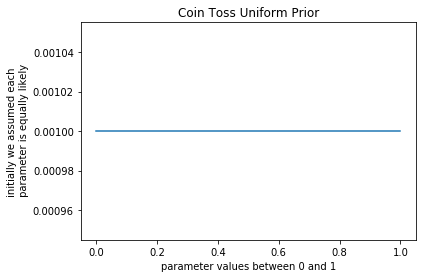

In [28]:
params = np.linspace(0,1, 1000)

priors = [1/len(params) for p in params]

plt.plot(params, priors)

plt.xlabel('parameter values between 0 and 1')
plt.ylabel('initially we assumed each\n parameter is equally likely')
plt.title('Coin Toss Uniform Prior')
plt.show()




let's get some data. Here we will know the true $p$ (probability of getting H or T) parameter but in general if you are tossing a coin 
note that there is no way to know this explicitly.

In [54]:
np.random.seed(12022020)
data  = np.random.binomial(1, p = 0.35, size = 1000)

Now given this data we want to update the prior. 

$$ P(p|data) = \frac{P(data|p)P(p)}{P(data)} $$


In [55]:
## we define a list called posterior
## we will collect updated parameters in this list
posterior = []

## initially we assume all the parameters are equally weighted
priors = [1/len(params) for p in params]

## After each coin toss we will update our prior parameters
for coin in data:
    ## take parameters as p and from priors list take prior
    for p, prior in zip(params,priors):
        
        ## this likelihood is calculated from the numerator of Bayes' theorem
        ## note that 'coin' is either 1 or 0
        ## if coin = 1 p**coin  = p and (1-p)**(1-coin) = 1 so likelihood = p
        ## if coin = 0 p**coin = 1 and (1-p)**(1-coin) = (1-p) so likelihood = 1-p
        likelihood = ((p)**(coin))*((1-p)**(1-coin))
        
        ## posterior is just the multiplication of likelihood and prior
        posterior.append(likelihood*prior)
    
    ## total probability should add up to 1
    ## in Bayes' theorem this corresponds to dividing with P(data)
    posterior = posterior/sum(posterior)
    
    ## for the next coin this adjusted posterior will be a prior
    priors = posterior
    
    ## empty posterior so that we can record new posteriors in this list again
    posterior = []
    
    

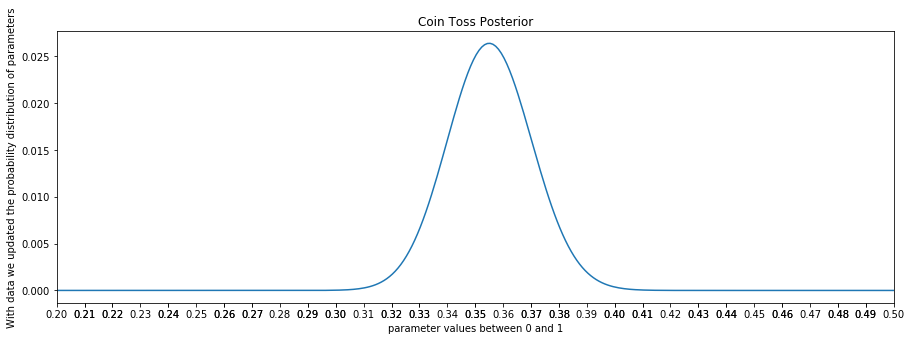

In [56]:
plt.figure(figsize= (15, 5))
plt.plot(params, priors)

plt.xlabel('parameter values between 0 and 1')
plt.ylabel('With data we updated the probability distribution of parameters')
plt.xticks(ticks = np.round(np.linspace(0.2,0.5, 50), 2))
plt.xlim(0.2, 0.5)
plt.title('Coin Toss Posterior')
plt.show()

"The probability of getting a tails ~35% of the time is ~8%" - the bayesian.  (it's a PDF).

# Maximum Likelihood Estimation

In [1]:
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt

import pickle

__Try!__

- load the sample data which is a pickled object
- the name of the file is sample.pickle

In [2]:
# %load -r 13-14 supplement.py
with open('sample.pickle', 'rb') as handle:
    s = pickle.load(handle)

In [7]:
s

array([ 8.14513959, 12.22543772, 11.82754601,  8.6578938 ,  7.51052901,
       10.49275333,  9.89496179,  9.95785769,  9.13849707, 10.88576667])

__Try!__

Now write a function that scatter plots of these sample point for a given mean and standard deviation.

[Review the effect of mu and sigma in normal distribution](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

In [22]:
# %load -r 1-11 supplement.py


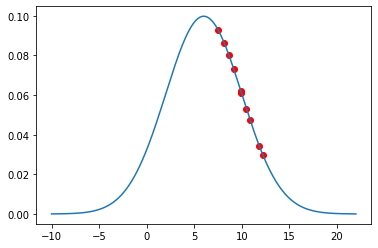

In [6]:
create_dist(sample = s, parameters = [6,4])

[A gentle intro to maximum likelihood](https://www.youtube.com/watch?v=XepXtl9YKwc)

Recall that normal distribution is given as (here x is the variable and $\mu_{0}$ and $\sigma_{0}$ assumed to be known)

$$ \mathcal{N(x, \big|\,\mu_{0}, \sigma_{0})} = \frac{1}{\sqrt{2\pi\sigma_{0}}}exp(-\frac{x- \mu_{0}}{-2\sigma_{0}^{2}})$$

Likelihood will be written as (note that here $x_i$ is assumed to be given):

$$ L(\mu, \sigma\, \big|\,x_{i}) = \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{x_{i}- \mu}{-2\sigma^{2}})$$

Now write a function that returns likelihood of having some parameters $\mu$ and $\sigma$ given this sample.

or you might want to use __scipy.stats.norm.pdf__

- Case 1: What is the likelihood of having parameters $\mu = 0$ and $\sigma = 1$ for given this sample.

- Case 2: What is the likelihood of having parameters $\mu = 10$ and $\sigma = 3$ for this given sample.

__Q__: How we would find the best parameters?

# Further Research

[A video that explains the math of maximum likelihood method](https://www.youtube.com/watch?v=Dn6b9fCIUpM)